In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
dat = pd.read_csv('data/Davis.csv')

In [3]:
dat.columns

Index(['sex', 'weight', 'height', 'repwt', 'repht'], dtype='object')

In [4]:
print(dat['weight'][:10], dat['height'][:10])
print(np.log(dat['weight'][:10]))

0    77
1    58
2    53
3    68
4    59
5    76
6    76
7    69
8    71
9    65
Name: weight, dtype: int64 0    182
1    161
2    161
3    177
4    157
5    170
6    167
7    186
8    178
9    171
Name: height, dtype: int64
0    4.343805
1    4.060443
2    3.970292
3    4.219508
4    4.077537
5    4.330733
6    4.330733
7    4.234107
8    4.262680
9    4.174387
Name: weight, dtype: float64


In [5]:
logdat = np.log(np.c_[dat['weight'], dat['height']/100].astype("float"))
logdat[:10]

array([[4.34380542, 0.5988365 ],
       [4.06044301, 0.47623418],
       [3.97029191, 0.47623418],
       [4.21950771, 0.57097955],
       [4.07753744, 0.45107562],
       [4.33073334, 0.53062825],
       [4.33073334, 0.51282363],
       [4.2341065 , 0.62057649],
       [4.26267988, 0.57661336],
       [4.17438727, 0.53649337]])

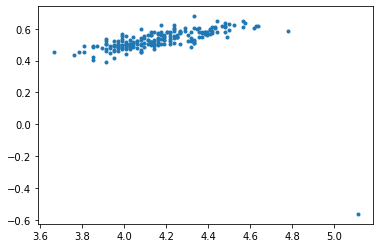

In [6]:
plt.plot(logdat[:, 0], logdat[:, 1], '.')
plt.show();

In [7]:
# 外れ値を削除
clean_logdat = np.delete(logdat, 11, axis = 0)

In [8]:
# 外れ値を削除したデータに対して主成分分析を実行
pca = PCA()
pca.fit(clean_logdat)

PCA()

In [9]:
pca.components_

array([[ 0.97754866,  0.21070979],
       [-0.21070979,  0.97754866]])

In [10]:
feature = pca.transform(clean_logdat)

In [11]:
# 主成分得点
pd.DataFrame(feature).head()

,0,1
0,0.194143,0.025791
1,-0.108691,-0.034352
2,-0.196818,-0.015356
3,0.066766,0.024750
4,-0.097282,-0.062547


In [12]:
# 寄与率と累積寄与率は、第何主成分まででどのくらいの情報を説明できるかという指標
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.975367
1,0.024633


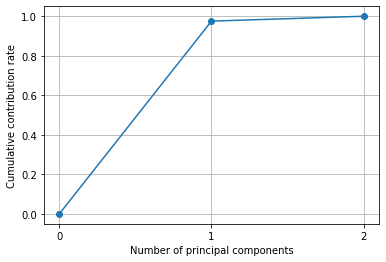

In [13]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [14]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_)

,0
0,0.039947
1,0.001009


In [15]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_)

,0,1
0,0.977549,0.210710
1,-0.210710,0.977549


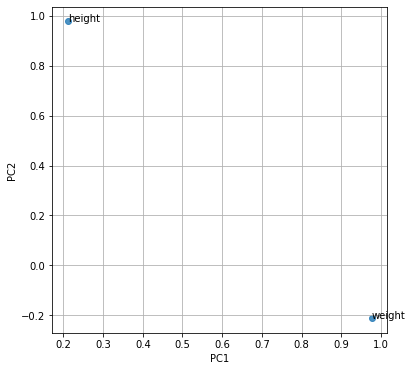

In [16]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], ['weight', 'height']):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [17]:
# 因子分析
from sklearn.datasets import load_boston

In [18]:
BostonHousing = load_boston()

In [19]:
BostonHousing

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [20]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale


In [21]:
# データのスケーリング
X = scale(BostonHousing.data)

In [22]:
# データ行列のサイズ(データ数, 次元)
X.shape

(506, 13)

In [23]:
fa = FactorAnalysis(n_components=3) # 因子数を3で推定
rX = fa.fit_transform(X) # 因子スコア
rX.shape

(506, 3)

In [24]:
# 因子負荷行列
fa.components_

array([[ 0.6121372 , -0.4957598 ,  0.81341902,  0.00512797,  0.80406482,
        -0.3737183 ,  0.67562989, -0.71558151,  0.88828641,  0.93353022,
         0.47185072, -0.4688966 ,  0.66715612],
       [-0.14078614, -0.50308575,  0.26434287,  0.12250032,  0.3361002 ,
        -0.24617668,  0.47316763, -0.50591099, -0.31994494, -0.2548487 ,
        -0.09045084,  0.06657234,  0.27624587],
       [-0.04355955, -0.0156834 , -0.02700214,  0.18605562,  0.1230639 ,
         0.74390582,  0.12903434, -0.25659733,  0.05578977, -0.00510409,
        -0.27274263, -0.00219808, -0.39340095]])

In [25]:
fa.components_.shape # サイズは(因子数, 次元)

(3, 13)

In [26]:
# 因子負荷行列の要素: 絶対値の大きさでソート
# NumPyの関数numpy.sort()を2次元のNumPy配列ndarrayに適用すると、各行・各列の値が別々に昇順にソートされたndarrayを取得できる。
# 特定の行または列を基準にソートしたい場合はnumpy.argsort()を使う。numpy.argsort()はソートされた値ではなくインデックスのndarrayを返す関数
BostonHousing.feature_names[np.argsort(np.abs(fa.components_[0,]))[::-1]]

array(['TAX', 'RAD', 'INDUS', 'NOX', 'DIS', 'AGE', 'LSTAT', 'CRIM', 'ZN',
       'PTRATIO', 'B', 'RM', 'CHAS'], dtype='<U7')

In [27]:
import statsmodels.api as sm
from statsmodels.multivariate.factor_rotation import rotate_factors

In [28]:
L, T = sm.multivariate.factor_rotation.rotate_factors(fa.components_.T, 'varimax')

In [29]:
print(L)
print(L.shape)

[[ 0.57043995  0.21934573 -0.15137979]
 [-0.09178679 -0.66322651  0.22544355]
 [ 0.48692369  0.64452273 -0.28240492]
 [-0.06175166  0.15858936  0.14382443]
 [ 0.44269911  0.74439351 -0.15660172]
 [-0.11661929 -0.1440654   0.84812104]
 [ 0.25798213  0.77891875 -0.15409093]
 [-0.27557962 -0.86904556  0.05158209]
 [ 0.90274757  0.27065679 -0.0795093 ]
 [ 0.89683556  0.32472334 -0.16338088]
 [ 0.41839969  0.10212588 -0.346013  ]
 [-0.41359763 -0.21133849  0.09259467]
 [ 0.34734964  0.448523   -0.59527198]]
(13, 3)


In [30]:
print(T)
print(T.shape)

[[ 0.79617975  0.55689587 -0.23656878]
 [-0.6034943   0.75901602 -0.24431396]
 [ 0.04350206  0.33728574  0.94039667]]
(3, 3)


In [31]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

In [32]:
n = 10 # データ数
k = 2 # データの次元
V = np.random.rand(n, k) # 真の配置
d = euclidean_distances(V) # 距離行列

In [33]:
d.shape

(10, 10)

In [34]:
# 計量的MDS(次元2): 10個の初期値で計算し、最適な解を採用
md = MDS(n_components=2, metric=True, dissimilarity='precomputed',
        n_init=10, max_iter=3000)

In [35]:
md.fit(d)

MDS(dissimilarity='precomputed', max_iter=3000, n_init=10)

In [36]:
# 再構成された2次元点配置
rV2 = md.embedding_

In [37]:
rV2

array([[ 0.09325894, -0.25869026],
       [-0.21688933,  0.1394674 ],
       [-0.51674897, -0.09107815],
       [-0.2891557 , -0.23264274],
       [ 0.2025718 ,  0.18065014],
       [ 0.51762947,  0.15675262],
       [-0.13252145,  0.01095856],
       [ 0.35005812, -0.41887474],
       [ 0.0522063 ,  0.34217146],
       [-0.06040917,  0.17128571]])

In [38]:
md.set_params(n_components = 1)

MDS(dissimilarity='precomputed', max_iter=3000, n_components=1, n_init=10)

In [39]:
md.fit(d)

MDS(dissimilarity='precomputed', max_iter=3000, n_components=1, n_init=10)

In [40]:
# 再構成された1次元点配置
rV1 = md.embedding_

In [41]:
rV1

array([[-0.22560151],
       [-0.13339723],
       [-0.56723701],
       [-0.41103512],
       [ 0.17666437],
       [ 0.59418612],
       [-0.10510304],
       [ 0.32622278],
       [ 0.34427908],
       [ 0.00102157]])

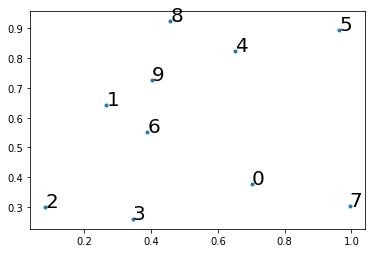

In [42]:
# 元データのプロット
plt.scatter(V[:, 0], V[:, 1], marker='.');
for i, (x, y) in enumerate(zip(V[:, 0], V[:, 1])):
    plt.annotate(str(i), (x, y), fontsize=20) # 点番号も表示
plt.show()

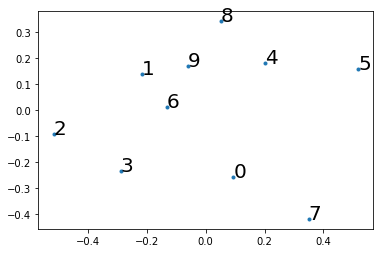

In [43]:
# 計量的MDSで再構成した点のプロット
plt.scatter(rV2[:, 0], rV2[:, 1], marker='.');
for i , (x, y) in enumerate(zip(rV2[:, 0], rV2[:, 1])):
    plt.annotate(str(i), (x, y), fontsize=20)
plt.show()

In [44]:
# annotateメソッドの使い方
help(plt.annotate)

Help on function annotate in module matplotlib.pyplot:

annotate(text, xy, *args, **kwargs)
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'
    
        The coordinate system that *xy* is given in. The following types
        of values are supported:
    
        - One of the fo

In [45]:
from sklearn.manifold import MDS

In [52]:
data = pd.read_csv('data/voting.csv').values
data.shape

(15, 16)

In [55]:
# S: 非類似度行列(投票行動), pidx: 所属する党(0/1)
S = data[:, :15]
pidx = data[:, 15]

In [56]:
# 所属する党を区別するマーク
col = ['red', 'blue']
mk = ['x', 'o']

In [58]:
S.shape

(15, 15)

In [63]:
# 非計量的MDS
nmd = MDS(n_components=2, metric=False, dissimilarity='precomputed',
         n_init=100, max_iter=3000)

In [64]:
# フィッティング
nmd.fit(S)

MDS(dissimilarity='precomputed', max_iter=3000, metric=False, n_init=100)

In [65]:
# nmd.embedding_は再構成された2次元点配置
px = nmd.embedding_[:, 0]
py = nmd.embedding_[:, 1]

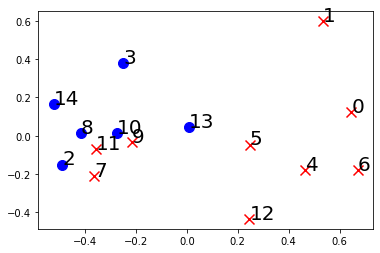

In [66]:
for i in [0, 1]:
    plt.scatter(px[pidx == i], py[pidx == i], c = col[i],
               marker = mk[i], s = 100)

for i , (x, y) in enumerate(zip(px, py)):
    plt.annotate(str(i), (x, y), fontsize = 20)
plt.show()

In [67]:
# 計量的MDS
nmd.set_params(metric = True)


MDS(dissimilarity='precomputed', max_iter=3000, n_init=100)

In [68]:
nmd.fit(S)

MDS(dissimilarity='precomputed', max_iter=3000, n_init=100)

In [69]:
# nmd.embedding_は再構成された2次元点配置
px = nmd.embedding_[:, 0]
py = nmd.embedding_[:, 1]

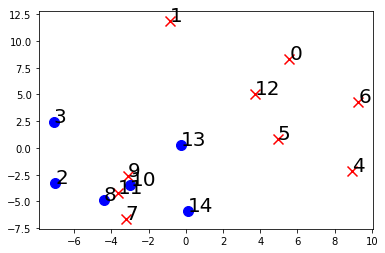

In [70]:
for i in [0, 1]:
    plt.scatter(px[pidx == i], py[pidx == i], c = col[i],
               marker = mk[i], s = 100)

for i , (x, y) in enumerate(zip(px, py)):
    plt.annotate(str(i), (x, y), fontsize = 20)
plt.show()